"Instructions
This week's assignment will integrate several of the concepts we have looked at so far and offer quite a bit of opportunity for creativity.

The World Bank is an excellent place to get comparative data sets. Choose a data set from there to work with:
Go to https://data.worldbank.org/
Under the "World Bank Open Data" header,  choose "Browse by Indicator"
At this point you will see literally hundreds of economic indicators to choose from. Feel free to choose anything that looks interesting. I chose "Government Expenditure on Education, total (% of GDP)" as an example.
On the right hand side, choose "Databank".
On the left side you will see the Variables tab chosen by default. My recommendation is to open the "Country" section and limit the countries in some manner.  Ex: South America, Africa, etc. (the funnel icon will help filter by region).
When you are satisfied with the region/countries, find the Download link in the upper-right corner and download a CSV file.
Load the dataset into a dataframe.
Delete the useless columns like "Series Name", "Country Code", etc.
Look at your data:
Are there any NaNs?
Are missing values represented any other way?
Is it easier to deal with missing data now or after the reshaping?
If you think it is easier now, do so.
Use the melt function to reshape the data into long format.
Deal with missing values now if you didn't earlier
Perform some minimal analysis of the data using, descriptive statistics, the groupby function, aggregation functions, etc."


### dataset description
We will be using the "government expenditure on education" dataset as used in the intro. We will be deleting useless columns and analyze the data and evaluate how reshaping the dataset will help change and make analysis easier. We use the dataset found here: https://databank.worldbank.org/source/education-statistics-%5e-all-indicators and look at GDP % spending by country, verbatim to the instructions to avoid confusion. We will discuss how we tidy the data and reshape it throughout to make the dataset easier and better fot analysis as we progress. 

### setup

In [1]:
# Here are packages we will import and will use throughout the lab(mostly). We will discuss them more while they are in use.

import os
import requests

import pandas as pd
import numpy as np

In [2]:
gdp1 = pd.read_csv('week3_gdp1.csv')

In [3]:
print(gdp1.head(n=2))

  Country Name Country Code  \
0        Aruba          ABW   
1  Afghanistan          AFG   

                                      Indicator Name     Indicator Code  1960  \
0  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   
1  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   

   1961  1962  1963  1964  1965  ...     2010     2011     2012     2013  \
0   NaN   NaN   NaN   NaN   NaN  ...  6.92927  6.11913  6.54906  6.80806   
1   NaN   NaN   NaN   NaN   NaN  ...  3.47945  3.46201  2.60420  3.45446   

      2014     2015     2016     2017  2018  2019  
0  6.16293  6.48175  6.18990      NaN   NaN   NaN  
1  3.69522  3.25580  4.22836  4.05887   NaN   NaN  

[2 rows x 64 columns]


### using concat() function 

In [4]:
pd.concat([gdp1])

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.92927,6.11913,6.54906,6.80806,6.16293,6.48175,6.18990,NaN,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.42132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.72174,5.96275,6.37164,6.01354,6.04662,5.95619,5.94285,6.11306,6.15899,NaN
262,Zambia,ZMB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.62432,3.74792,3.72965,4.66738,NaN


### checking shape

In [5]:
print(gdp1.shape)

(264, 64)


In [6]:
list_gdp1_df = []

In [7]:
for csv_filename in 'week3_gdp.csv' :
   

    df = pd.read_csv('week3_gdp.csv')
    
    list_gdp1_df.append(df)
    
print(len(list_gdp1_df))

13


In [8]:
print(len(gdp1))

264


In [9]:
print(type(list_gdp1_df))

<class 'list'>


In [10]:
print(type(gdp1))

<class 'pandas.core.frame.DataFrame'>


we see this is not a very helpful view

In [11]:
print(gdp1.head())

  Country Name Country Code  \
0        Aruba          ABW   
1  Afghanistan          AFG   
2       Angola          AGO   
3      Albania          ALB   
4      Andorra          AND   

                                      Indicator Name     Indicator Code  1960  \
0  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   
1  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   
2  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   
3  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   
4  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   

   1961  1962  1963  1964  1965  ...     2010     2011     2012     2013  \
0   NaN   NaN   NaN   NaN   NaN  ...  6.92927  6.11913  6.54906  6.80806   
1   NaN   NaN   NaN   NaN   NaN  ...  3.47945  3.46201  2.60420  3.45446   
2   NaN   NaN   NaN   NaN   NaN  ...  3.42132      NaN      NaN      NaN   
3   NaN   NaN   NaN   

##  Use the melt function to reshape the data into long format.

this is not very helpful in this dataset at this moment


In [12]:
pew = pd.read_csv('week3_gdp1.csv')

print(pew.iloc[:,0:6])

     Country Name Country Code  \
0           Aruba          ABW   
1     Afghanistan          AFG   
2          Angola          AGO   
3         Albania          ALB   
4         Andorra          AND   
..            ...          ...   
259        Kosovo          XKX   
260   Yemen, Rep.          YEM   
261  South Africa          ZAF   
262        Zambia          ZMB   
263      Zimbabwe          ZWE   

                                        Indicator Name     Indicator Code  \
0    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
1    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
2    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
3    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
4    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
..                                                 ...                ...   
259  Government expenditure on education, total (% .

### using _long function 

we see this is not very useful in reshaping this dataset

In [13]:
pew_long = pd.melt(pew)


print(pew_long.head())

       variable        value
0  Country Name        Aruba
1  Country Name  Afghanistan
2  Country Name       Angola
3  Country Name      Albania
4  Country Name      Andorra


In [14]:
print(pew_long.tail())

      variable value
16891     2019   NaN
16892     2019   NaN
16893     2019   NaN
16894     2019   NaN
16895     2019   NaN


In [15]:
print(pew)

     Country Name Country Code  \
0           Aruba          ABW   
1     Afghanistan          AFG   
2          Angola          AGO   
3         Albania          ALB   
4         Andorra          AND   
..            ...          ...   
259        Kosovo          XKX   
260   Yemen, Rep.          YEM   
261  South Africa          ZAF   
262        Zambia          ZMB   
263      Zimbabwe          ZWE   

                                        Indicator Name     Indicator Code  \
0    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
1    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
2    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
3    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
4    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
..                                                 ...                ...   
259  Government expenditure on education, total (% .

In [16]:
gg = pd.read_csv('week3_gdp1.csv')


In [17]:
print(gg)

     Country Name Country Code  \
0           Aruba          ABW   
1     Afghanistan          AFG   
2          Angola          AGO   
3         Albania          ALB   
4         Andorra          AND   
..            ...          ...   
259        Kosovo          XKX   
260   Yemen, Rep.          YEM   
261  South Africa          ZAF   
262        Zambia          ZMB   
263      Zimbabwe          ZWE   

                                        Indicator Name     Indicator Code  \
0    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
1    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
2    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
3    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
4    Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
..                                                 ...                ...   
259  Government expenditure on education, total (% .

## Keep multiple columns fixed (ex: 6.2.2)

In [18]:
print(gg.iloc[0:5, 0:16])

  Country Name Country Code  \
0        Aruba          ABW   
1  Afghanistan          AFG   
2       Angola          AGO   
3      Albania          ALB   
4      Andorra          AND   

                                      Indicator Name     Indicator Code  1960  \
0  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   
1  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   
2  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   
3  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   
4  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   NaN   

   1961  1962  1963  1964  1965  1966  1967  1968  1969  1970     1971  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.16036  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      NaN  
3   NaN   NaN   NaN   NaN   NaN   

In [19]:
#Dataframe dataset  -- starting to see a better perspective of the data

In [20]:
df = pd.DataFrame(gg)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.92927,6.11913,6.54906,6.80806,6.16293,6.48175,6.18990,NaN,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.42132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.72174,5.96275,6.37164,6.01354,6.04662,5.95619,5.94285,6.11306,6.15899,NaN
262,Zambia,ZMB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.62432,3.74792,3.72965,4.66738,NaN


## melt wide-to-long  
we went from 264rows x 11 columns to 16632 rows x 3 columns

this will not be very useful in this dataset

In [21]:
df_long = pd.melt(df, id_vars='Country Name')
df_long

,Country Name,variable,value
0,Aruba,Country Code,ABW
1,Afghanistan,Country Code,AFG
2,Angola,Country Code,AGO
3,Albania,Country Code,ALB
4,Andorra,Country Code,AND
...,...,...,...
16627,Kosovo,2019,NaN
16628,"Yemen, Rep.",2019,NaN
16629,South Africa,2019,NaN
16630,Zambia,2019,NaN


here we see we can melt to 2 columns. this is not partucularly useful in this scenario

In [22]:
df_long = pd.melt(df, var_name='name')
df_long

,name,value
0,Country Name,Aruba
1,Country Name,Afghanistan
2,Country Name,Angola
3,Country Name,Albania
4,Country Name,Andorra
...,...,...
16891,2019,NaN
16892,2019,NaN
16893,2019,NaN
16894,2019,NaN


## pivot 

In [23]:
df.pivot(index='Country Name', columns='1960')

,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN
Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866,NaN
Algeria,DZA,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,ASM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,PSE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.72547,5.70270,5.13268,5.30250,NaN,5.14136,5.71773,5.25234,NaN,NaN
World,WLD,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.53966,4.30930,4.35106,4.59384,4.62946,4.73792,4.48683,NaN,NaN,NaN


Dataframe alternatives -- not much help in getting a better perspective

In [24]:
pt = pd.DataFrame(gg)
pt

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.92927,6.11913,6.54906,6.80806,6.16293,6.48175,6.18990,NaN,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.42132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.72174,5.96275,6.37164,6.01354,6.04662,5.95619,5.94285,6.11306,6.15899,NaN
262,Zambia,ZMB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.62432,3.74792,3.72965,4.66738,NaN


## using pivot_table with contry name as index

In [25]:
table = pd.pivot_table(df,  index='Country Name')

In [26]:
table

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,1.16036,1.11718,1.42788,NaN,1.30332,NaN,NaN,NaN,1.73981,...,NaN,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.18201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.15484,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.72547,5.70270,5.13268,5.30250,NaN,5.14136,5.71773,5.25234,NaN
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.65950,4.53966,4.30930,4.35106,4.59384,4.62946,4.73792,4.48683,NaN,NaN
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
table=pd.pivot(df, index='Country Name', columns='1960')
table

,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN
Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866,NaN
Algeria,DZA,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,ASM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,PSE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.72547,5.70270,5.13268,5.30250,NaN,5.14136,5.71773,5.25234,NaN,NaN
World,WLD,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.53966,4.30930,4.35106,4.59384,4.62946,4.73792,4.48683,NaN,NaN,NaN


In [28]:
gg.shape

(264, 64)

In [29]:
num_rows = gg.shape[0]
num_missing = num_rows - gg.count()
num_missing

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2015              125
2016              125
2017              160
2018              192
2019              264
Length: 64, dtype: int64

In [30]:
np.count_nonzero(gg.isnull())

11162

In [31]:
#all rows have data above

In [32]:
df = pd.DataFrame(gg)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.92927,6.11913,6.54906,6.80806,6.16293,6.48175,6.18990,NaN,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.42132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.72174,5.96275,6.37164,6.01354,6.04662,5.95619,5.94285,6.11306,6.15899,NaN
262,Zambia,ZMB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.62432,3.74792,3.72965,4.66738,NaN


## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

## here we no longer have the columns with Country Code & Indicator Removed using 'groupby' function

In [33]:
df.groupby(['Country Name']).mean()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.72547,5.70270,5.13268,5.30250,NaN,5.14136,5.71773,5.25234,NaN,NaN
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.53966,4.30930,4.35106,4.59384,4.62946,4.73792,4.48683,NaN,NaN,NaN
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### counting missing values using is.na
we still have na values to take care of

In [34]:
df.isna().sum

<bound method DataFrame.sum of      Country Name  Country Code  Indicator Name  Indicator Code  1960  1961  \
0           False         False           False           False  True  True   
1           False         False           False           False  True  True   
2           False         False           False           False  True  True   
3           False         False           False           False  True  True   
4           False         False           False           False  True  True   
..            ...           ...             ...             ...   ...   ...   
259         False         False           False           False  True  True   
260         False         False           False           False  True  True   
261         False         False           False           False  True  True   
262         False         False           False           False  True  True   
263         False         False           False           False  True  True   

     1962  1963  196

## must make new dataframe 

In [35]:
df.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2015              125
2016              125
2017              160
2018              192
2019              264
Length: 64, dtype: int64

## Using  .agg("mean") to see a unique view of the data by using the mean of all countries by year

we still have some NaN values to adjust. this is a unique and cool pperspective of the dataset however

In [36]:
df.agg("mean")

1960         NaN
1961         NaN
1962         NaN
1963         NaN
1964         NaN
1965         NaN
1966         NaN
1967         NaN
1968         NaN
1969         NaN
1970    3.920546
1971    3.936929
1972    4.008856
1973    3.934750
1974    4.028868
1975    4.035079
1976    4.260663
1977    4.493258
1978    4.281640
1979    4.178609
1980    4.110438
1981    4.138051
1982    4.121175
1983    4.290626
1984    4.421478
1985    4.156387
1986    4.174813
1987    4.144340
1988    4.390386
1989    4.225069
1990    3.980639
1991    4.199279
1992    4.646395
1993    4.678432
1994    5.135491
1995    4.081503
1996    4.133314
1997    4.057986
1998    4.051619
1999    4.418726
2000    4.203813
2001    4.447194
2002    4.353740
2003    4.513215
2004    4.152816
2005    4.366244
2006    4.377239
2007    4.311905
2008    4.402152
2009    4.684145
2010    4.508931
2011    4.232165
2012    4.284232
2013    4.409521
2014    4.487247
2015    4.609717
2016    4.477883
2017    4.151883
2018    4.1211

## Drop columns 1960-1969 & 2019 because they have no data using .drop

In [37]:
df.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969','2019'], axis=1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.92479,6.92927,6.11913,6.54906,6.80806,6.16293,6.48175,6.18990,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,1.16036,1.11718,1.42788,NaN,1.30332,...,NaN,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.42132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.15484,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.24869,5.72174,5.96275,6.37164,6.01354,6.04662,5.95619,5.94285,6.11306,6.15899
262,Zambia,ZMB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,4.38781,6.09535,5.94579,5.48807,4.87801,6.23854,...,NaN,NaN,NaN,NaN,NaN,NaN,4.62432,3.74792,3.72965,4.66738


## groupby Country Name W/ dropped columns 1960-1969 & 2019 with no data

we no longer have useless columsn with missing NaN values

https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/

In [38]:
df.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969','2019'], axis=1).groupby(['Country Name']).mean()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,1.16036,1.11718,1.42788,NaN,1.30332,NaN,NaN,NaN,1.73981,...,NaN,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.18201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.15484,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.72547,5.70270,5.13268,5.30250,NaN,5.14136,5.71773,5.25234,NaN
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.65950,4.53966,4.30930,4.35106,4.59384,4.62946,4.73792,4.48683,NaN,NaN
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data still has missing values represented in the rows now that the columns with missing data is now deleted. 

## columns dropped = drop_c using groupby() function

this is starting to provide a solid view of the dataset. We stil have NaN values in the rows to take care of yet.

In [39]:
pp = df.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969','2019'], axis=1).groupby(['Country Name']).mean()

In [40]:
pp

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,1.16036,1.11718,1.42788,NaN,1.30332,NaN,NaN,NaN,1.73981,...,NaN,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.18201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.15484,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.72547,5.70270,5.13268,5.30250,NaN,5.14136,5.71773,5.25234,NaN
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.65950,4.53966,4.30930,4.35106,4.59384,4.62946,4.73792,4.48683,NaN,NaN
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transpose using .T

we see a cool view here but still have tons of missing NaN values. This is a useful tool to see a unique view however

In [41]:
pp.T

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.45809,NaN,...,NaN,NaN,3.55898,NaN,NaN,NaN,NaN,NaN,4.38781,NaN
1971,1.16036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.57356,NaN,NaN,NaN,NaN,NaN,6.09535,NaN
1972,1.11718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.93620,NaN,...,NaN,NaN,4.13556,NaN,NaN,NaN,NaN,NaN,5.94579,NaN
1973,1.42788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.78052,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.48807,NaN
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92352,NaN,...,NaN,NaN,3.37524,NaN,NaN,NaN,NaN,NaN,4.87801,NaN
1975,1.30332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84360,NaN,...,NaN,NaN,4.44439,NaN,NaN,NaN,NaN,NaN,6.23854,NaN
1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.16564,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02694,NaN
1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.71984,NaN,...,NaN,NaN,4.49410,NaN,NaN,NaN,NaN,NaN,5.69251,NaN
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.93555,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.74075,NaN
1979,1.73981,NaN,7.18201,NaN,NaN,NaN,NaN,NaN,2.40028,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.15494,2.31784


## pivot on 'country name' 

this provides a great perspective

In [42]:
pp.pivot_table(index='Country Name')

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,1.16036,1.11718,1.42788,NaN,1.30332,NaN,NaN,NaN,1.73981,...,NaN,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61025,2.46866
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.18201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.15484,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19505,3.22691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.72547,5.70270,5.13268,5.30250,NaN,5.14136,5.71773,5.25234,NaN
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.65950,4.53966,4.30930,4.35106,4.59384,4.62946,4.73792,4.48683,NaN,NaN
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


notice we still have NaN values in the rows. The next step will help to eliminate that. 

## now we are able to use .stack() function 

### this provides us with an awesome view of the dataseet. This stacy() command also handled out NaN missing values and proves very clean/tidy data. 

### We have eliminated missing values in columns now. This is a solid dataframe to continue alnalysis with.

In [43]:
pp_stack = pp.pivot_table(index='Country Name').stack()
pp_stack

Country Name      
Afghanistan   1971    1.16036
              1972    1.11718
              1973    1.42788
              1975    1.30332
              1979    1.73981
                       ...   
Zimbabwe      2012    6.07021
              2013    5.99598
              2014    6.13835
              2017    5.62184
              2018    4.60449
Length: 4678, dtype: float64

## A unique perspective  using   .agg() function

'Mean' by year w/ missing year data dropped. this could be useful data for further analysis

In [44]:
pp.agg("mean")

1970    3.920546
1971    3.936929
1972    4.008856
1973    3.934750
1974    4.028868
1975    4.035079
1976    4.260663
1977    4.493258
1978    4.281640
1979    4.178609
1980    4.110438
1981    4.138051
1982    4.121175
1983    4.290626
1984    4.421478
1985    4.156387
1986    4.174813
1987    4.144340
1988    4.390386
1989    4.225069
1990    3.980639
1991    4.199279
1992    4.646395
1993    4.678432
1994    5.135491
1995    4.081503
1996    4.133314
1997    4.057986
1998    4.051619
1999    4.418726
2000    4.203813
2001    4.447194
2002    4.353740
2003    4.513215
2004    4.152816
2005    4.366244
2006    4.377239
2007    4.311905
2008    4.402152
2009    4.684145
2010    4.508931
2011    4.232165
2012    4.284232
2013    4.409521
2014    4.487247
2015    4.609717
2016    4.477883
2017    4.151883
2018    4.121137
dtype: float64

We can look data by year of choice and contiue to make charts and manipulate this data for better and more unique insight. For now this is a great start and completes our weekly agenda.

In [45]:
pp['1971'].hist()

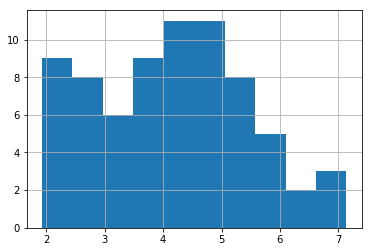

In [46]:
pp['2018'].hist()

## Summary

In conclusion, we were able to load the dataset related to expenditure as a % of GDP by country. We were successfully able to delete any columns that we not needed. We also were succefully able to run various reshaping commands to help better analyze the dataset. It was easier to slowly delete rows and then eventually columns and continue to adjust and reshape the dataset as we progressed, rather than initially. While we evolved the dataset and reshaped it, we were able to make subtle changes that eventually helped us to tidy up the dataset very well and provide a clean and useable dataset to continue analysis as needed.

### References:


Chen, D. Y. (2019). Python Data Analysis. Pearson Addison Wesley Data & Analytics Series. In Pandas for Everyone.

Grozev, N. (2018). Reshaping in Pandas - Pivot, Pivot-Table, Stack and Unstack. In UAlberta DataScience. Retrieved from https://sites.ualberta.ca/~hadavand/DataAnalysis/notebooks/Reshaping_Pandas.html.

Linderborg, R. (2017, January 20). Reshaping Data in Python. In HackerNoon. Retrieved from https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77.

Wickham, H. (n.d.). Tidy Data. In JSS Journal of Statistical Software Issue II.. Retrieved from https://vita.had.co.nz/papers/tidy-data.pdf.

QuantEcon, . (2020). Reshape. In QuantEcon DataScience. Retrieved from https://datascience.quantecon.org/pandas/reshape.html#%60pivot%60-and-%60pivot_table%60.
